# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observable Trends

* From the analysis we can see that the highest temparature is found a 0 latitude and temperature drop is affected by latitude increase or decrease. This affects equatorial regions as they receive direct sunlight

* Southern Hemisphere temparatures tend to be slightly milder in comparison to those at similar latitudes in the Northern Hemisphere. This could be attributed tothe Southern Hemisphere having significantly more ocean and much less land.

* Also, Lattitude has no considerable impact on wind speed. The speed of the wind is controlled by the strength of the air pressure gradient, the stronger the pressure gradient the higher the wind speed.

In [244]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [245]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [246]:
#Get the base url to pull the api request 
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#List to hold weather info
city_data = []
units = "imperial"
count = 1

# loop throught all the cities and append to city list
for city in cities:
    
    #Create search query, make request and store in json
    response = requests.get(base_url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    try:
        print(f"Processing Record for City {count}  | {response['name']}.")
        
        name = response['name']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        Humidity = response['main']['humidity']
        cloud = response['clouds']['all']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        city_data.append({"City": name,"Lat": lat, "Lng" : lng, "Max Temp(F)" :max_temp,"Humidity": Humidity ,"Cloudiness": cloud, "Wind Speed" : wind_speed,"Country" : country, "Date" :date })

    except (KeyError, IndexError):
        print("City not found. Skipping...")
    count = count + 1
        

Processing Record for City 1  | Hilo.
Processing Record for City 2  | Glendive.
Processing Record for City 3  | Puerto Ayora.
Processing Record for City 4  | Norman Wells.
Processing Record for City 5  | Coquimbo.
Processing Record for City 6  | Clyde River.
Processing Record for City 7  | Channel-Port aux Basques.
Processing Record for City 8  | Nikolskoye.
Processing Record for City 9  | Formosa do Rio Preto.
City not found. Skipping...
Processing Record for City 11  | George Town.
Processing Record for City 12  | Ushuaia.
Processing Record for City 13  | Lhokseumawe.
Processing Record for City 14  | Airai.
Processing Record for City 15  | Namatanai.
Processing Record for City 16  | Busselton.
Processing Record for City 17  | Lompoc.
Processing Record for City 18  | Atuona.
Processing Record for City 19  | Upata.
Processing Record for City 20  | Bredasdorp.
Processing Record for City 21  | Mitsamiouli.
Processing Record for City 22  | Mataura.
Processing Record for City 23  | Port El

Processing Record for City 190  | Sovetskiy.
Processing Record for City 191  | Shelui.
Processing Record for City 192  | Fayaoué.
Processing Record for City 193  | Parma.
Processing Record for City 194  | Kawambwa.
Processing Record for City 195  | Rock Sound.
City not found. Skipping...
Processing Record for City 197  | Anchorage.
Processing Record for City 198  | Kampot.
Processing Record for City 199  | Mola di Bari.
Processing Record for City 200  | Vigo.
Processing Record for City 201  | Ponta Delgada.
Processing Record for City 202  | Batavia.
Processing Record for City 203  | Madingou.
Processing Record for City 204  | Nanortalik.
Processing Record for City 205  | Tolbazy.
Processing Record for City 206  | Paciran.
Processing Record for City 207  | Mar del Plata.
Processing Record for City 208  | Plettenberg Bay.
Processing Record for City 209  | Khani.
Processing Record for City 210  | Pisco.
Processing Record for City 211  | Manokwari.
Processing Record for City 212  | Bend.
P

Processing Record for City 378  | Saint-Ambroise.
Processing Record for City 379  | São Joaquim.
Processing Record for City 380  | Moindou.
Processing Record for City 381  | Punta de Piedra.
Processing Record for City 382  | Mlimba.
Processing Record for City 383  | Surab.
Processing Record for City 384  | Province of Trapani.
Processing Record for City 385  | Pilar.
Processing Record for City 386  | Niamey.
City not found. Skipping...
Processing Record for City 388  | Tam Ky.
City not found. Skipping...
Processing Record for City 390  | Shakawe.
Processing Record for City 391  | Hailey.
Processing Record for City 392  | Bethel.
Processing Record for City 393  | Baghmara.
Processing Record for City 394  | Altoona.
Processing Record for City 395  | Broome.
City not found. Skipping...
Processing Record for City 397  | Zyryanka.
Processing Record for City 398  | Innisfail.
Processing Record for City 399  | Santa Lucía.
Processing Record for City 400  | Oriximiná.
Processing Record for Cit

Processing Record for City 568  | Sohag.
Processing Record for City 569  | Tessalit.
Processing Record for City 570  | Chase.
Processing Record for City 571  | Stornoway.
Processing Record for City 572  | Puerto Vallarta.
Processing Record for City 573  | Verāval.
City not found. Skipping...
Processing Record for City 575  | Liverpool.
Processing Record for City 576  | Tolga.
Processing Record for City 577  | Lumberton.
Processing Record for City 578  | Paita.
Processing Record for City 579  | Sosnogorsk.
Processing Record for City 580  | Morales.
Processing Record for City 581  | Faya.
City not found. Skipping...
Processing Record for City 583  | Seidu.
Processing Record for City 584  | Taunggyi.
Processing Record for City 585  | Yulara.
Processing Record for City 586  | Bandarbeyla.
Processing Record for City 587  | Chumikan.
Processing Record for City 588  | Durango.
City not found. Skipping...
Processing Record for City 590  | Turiaçu.
Processing Record for City 591  | Byron Bay.
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [247]:
#From the city append above, create a Dataframe
city_df = pd.DataFrame (city_data)
city_df.head()

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,84.2,58,1,11.41,US,1607303597
1,Glendive,47.11,-104.71,36.0,66,1,9.17,US,1607304253
2,Puerto Ayora,-0.74,-90.35,72.0,91,72,3.00,EC,1607303963
3,Norman Wells,65.28,-126.83,1.4,84,90,3.36,CA,1607304161
4,Coquimbo,-29.95,-71.34,57.2,82,75,8.05,CL,1607303908


In [272]:
# Push the DataFrame to a new CSV file
city_df.to_csv("../output_data/cities.csv",
                  encoding="utf-8", index=False, header=True)

In [249]:
# Use describe to display a statistical overview of the dataframe
city_df.describe()

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.00000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.320743,8.972554,52.96183,76.313406,53.958333,7.507917,1.607304e+09
std,33.174169,89.031131,26.60629,18.886075,41.020247,5.331742,3.106350e+02
min,-54.800000,-179.170000,-27.94000,13.000000,0.000000,0.070000,1.607304e+09
25%,-8.522500,-67.057500,33.80000,68.000000,4.750000,3.360000,1.607304e+09
50%,22.705000,14.835000,59.72000,82.000000,69.500000,6.550000,1.607304e+09
75%,47.270000,81.655000,75.20000,90.000000,95.000000,10.290000,1.607305e+09
max,78.220000,178.420000,93.20000,100.000000,100.000000,33.170000,1.607305e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [250]:
# Check if there are cities where the humidity > 100%
# city_df.drop(city_df.index[city_df['Humidity'] >100], inplace = True)
# city_df.head()

In [251]:
#  Get the indices of cities that have humidity over 100%.


In [252]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

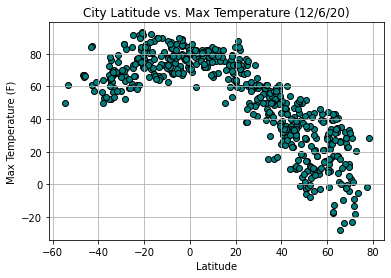

In [253]:
#We are using the city data to extract the values and do the conparison
x_values = city_df['Lat']
y_values = city_df['Max Temp(F)']
plt.scatter(x_values,y_values,facecolors="teal", edgecolors="black")
plt.title('City Latitude vs. Max Temperature (12/6/20)',fontsize = 12)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../output_data/figure_1.png")
plt.show()

##### Analysis
* The code analyses the correlation between city latitude and maximum temperature.From the plot we can see that at higher temperatures, Latitudes tend to have negative values 
* The plot proves that as we generally move away from the equator, temperature drops.

## Latitude vs. Humidity Plot

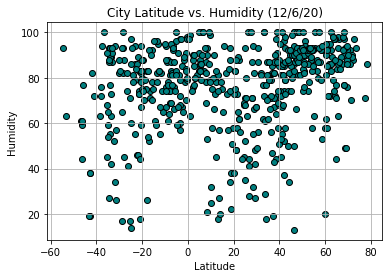

In [254]:
#We are using the city data to extract the values and do the conparison
x_values = city_df['Lat']
y_values = city_df['Humidity']
plt.scatter(x_values,y_values,facecolors="teal", edgecolors="black")
plt.title('City Latitude vs. Humidity (12/6/20)',fontsize = 12)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("../output_data/figure_2.png")
plt.show()

##### Analysis
* The plot above analyses the correlation between  latitude and humidity, Polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.


## Latitude vs. Cloudiness Plot

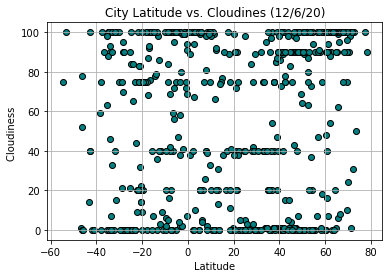

In [255]:
#We are using the city data to extract the values and do the conparison
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
plt.scatter(x_values,y_values,facecolors="teal", edgecolors="black")
plt.title('City Latitude vs. Cloudines (12/6/20)',fontsize = 12)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness ')
plt.grid()
plt.savefig("../output_data/figure_3.png")
plt.show()

##### Analysis
* The plot shows that there is no real pattern that can describe the correlation between latitude and cloudiness, the data is widely spread

## Latitude vs. Wind Speed Plot

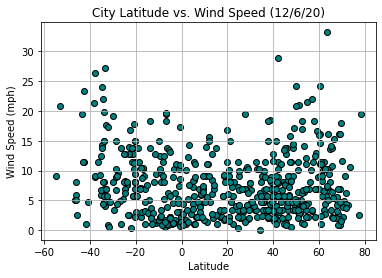

In [256]:
#We are using the city data to extract the values and do the conparison
x_values = city_df['Lat']
y_values = city_df['Wind Speed']
plt.scatter(x_values,y_values,facecolors="teal", edgecolors="black")
plt.title('City Latitude vs. Wind Speed (12/6/20)',fontsize = 12)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../output_data/figure_4.png")
plt.show()

##### Analysis
* The plot shows that there is no real pattern that can describe the correlation between latitude and windspeed, data is widely spread

## Linear Regression

In [257]:
#Extacst latitude values from existing dataframe and save results as new dataframe to use for plotting

#Northern Latitude
north_lat = city_df.loc[city_df['Lat'] >=0]

north_df = pd.DataFrame(north_lat )
north_df.head()

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,84.20,58,1,11.41,US,1607303597
1,Glendive,47.11,-104.71,36.00,66,1,9.17,US,1607304253
3,Norman Wells,65.28,-126.83,1.40,84,90,3.36,CA,1607304161
5,Clyde River,70.47,-68.59,3.20,91,90,2.24,CA,1607303881
6,Channel-Port aux Basques,47.57,-59.14,43.93,87,100,15.77,CA,1607304258


In [258]:
#Extacst latitude values from existing dataframe and save results as new dataframe to use for plotting

#Southern Latitude
south_lat = city_df.loc[city_df['Lat'] < 0]

south_df = pd.DataFrame(south_lat)
south_df.head()

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
2,Puerto Ayora,-0.74,-90.35,72.00,91,72,3.00,EC,1607303963
4,Coquimbo,-29.95,-71.34,57.20,82,75,8.05,CL,1607303908
8,Formosa do Rio Preto,-11.05,-45.19,73.06,65,0,1.28,BR,1607304260
10,Ushuaia,-54.80,-68.30,50.00,93,75,9.17,AR,1607303876
12,Airai,-8.93,125.41,70.39,87,100,1.90,TL,1607303942


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7339921740113504


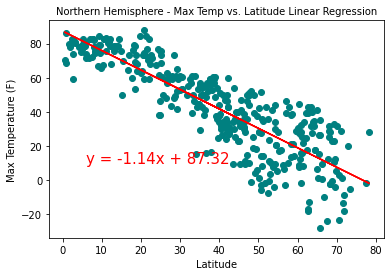

In [271]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = north_df['Lat']
y_values = north_df['Max Temp(F)']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


# Label plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_5.png")

# Show plot
plt.show()

##### Analysis
* The plot shows that in the nothern hemisphere, as you move away from the equator the temperature decreases
* In additon, the regression displaysa strong correlation between the data extracted for the analysis 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.24766433753582137


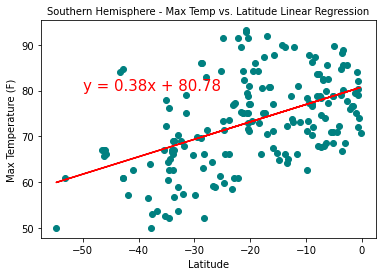

In [268]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = south_df['Lat']
y_values = south_df['Max Temp(F)']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")


# Label plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_6.png")

# Show plot
plt.show()


##### Analysis
* The plot shows that in the southern hemisphere, as you get closer to the equator the temperature increases.
* In additon, the regression displays a weak positive correlation between the data extacted for the analysis

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06521823855076224


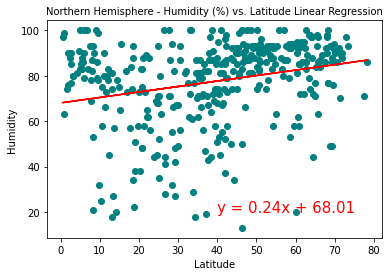

In [261]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = north_df['Lat']
y_values = north_df['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")


# Label plot
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_7.png")

# Show plot
plt.show()

##### Analysis
* The regression does not displays much of a correation between humidity and latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07945566863936919


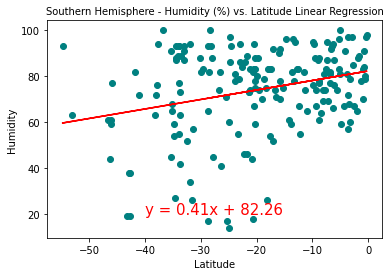

In [262]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = south_df['Lat']
y_values = south_df['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")


# Label plot
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_8.png")

# Show plot
plt.show()


##### Analysis
* The regression does not display much of a correlation between the data sets

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05697705900301407


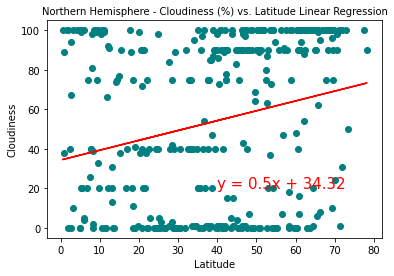

In [263]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")


# Label plot
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_9.png")

# Show plot
plt.show()

##### Analysis
* The regression does not display much of a correlation between the data sets.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.020963876879247494


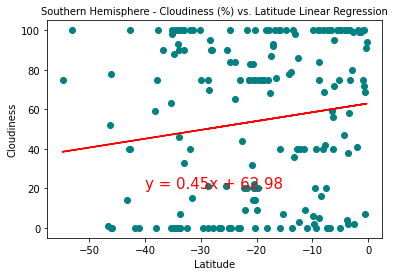

In [264]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")


# Label plot
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_10.png")

# Show plot
plt.show()

##### Analysis
* There is a weak positive correlation between latitude and cloudiness for southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03534686407223714


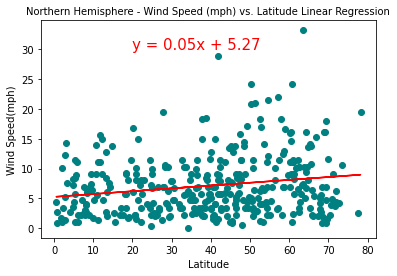

In [265]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")


# Label plot
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_11.png")

# Show plot
plt.show()

##### Analysis
* The regression does not display much of a correlation between the data sets.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10181366849040996


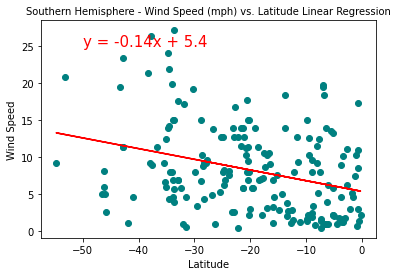

In [266]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")


# Label plot
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_12.png")

# Show plot
plt.show()

##### Analysis
* The regression does not display much of a correlation between the data sets.